In [1]:
# 라이브러리
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
import xgboost
from sklearn import metrics

In [3]:
lol = pd.read_csv('Data/League of Legends 2021 World Championship Play-In Groups Statistics - Raw Data.csv')

In [4]:
lol.shape

(220, 20)

In [5]:
lol.head()

,Team,Player,Opponent,Position,Champion,Kills,Deaths,Assists,Creep Score,Gold Earned,Champion Damage Share,Kill Participation,Wards Placed,Wards Destroyed,Ward Interactions,Dragons For,Dragons Against,Barons For,Barons Against,Result
0,UOL,Boss,GS,Top,Camille,4,5,3,188,11107,0.17,0.78,8,8,16,0,4,0,1,L
1,GS,Crazy,UOL,Top,Gwen,3,1,9,217,12201,0.20,0.52,10,7,17,4,0,1,0,W
2,UOL,Ahahacik,GS,Jungle,Trundle,2,4,5,156,9048,0.15,0.78,8,14,22,0,4,0,1,L
3,GS,Mojito,UOL,Jungle,Talon,5,4,10,194,11234,0.23,0.65,12,8,20,4,0,1,0,W
4,UOL,Nomanz,GS,Mid,Leblanc,1,3,4,216,9245,0.29,0.56,6,9,15,0,4,0,1,L


In [6]:
lol.describe()

,Kills,Deaths,Assists,Creep Score,Gold Earned,Champion Damage Share,Kill Participation,Wards Placed,Wards Destroyed,Ward Interactions,Dragons For,Dragons Against,Barons For,Barons Against
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,2.709091,2.718182,5.668182,200.340909,11008.159091,0.200000,0.608273,19.454545,8.704545,28.159091,2.090909,2.090909,0.545455,0.545455
std,2.579673,1.747179,3.888149,101.328153,3198.806207,0.095051,0.190404,15.713553,5.101614,18.051857,1.381849,1.381849,0.657050,0.657050
min,0.000000,0.000000,0.000000,14.000000,4714.000000,0.040000,0.000000,3.000000,1.000000,7.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,3.000000,156.000000,8691.250000,0.130000,0.500000,10.000000,5.000000,17.000000,1.000000,1.000000,0.000000,0.000000
50%,2.000000,3.000000,5.000000,210.000000,10454.500000,0.205000,0.625000,14.000000,7.000000,22.000000,2.000000,2.000000,0.000000,0.000000
75%,4.000000,4.000000,8.000000,266.250000,13431.750000,0.260000,0.740000,19.000000,12.000000,30.500000,3.250000,3.250000,1.000000,1.000000
max,13.000000,7.000000,19.000000,419.000000,20546.000000,0.470000,1.000000,92.000000,30.000000,112.000000,4.000000,4.000000,2.000000,2.000000


In [7]:
lol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Team                   220 non-null    object 
 1   Player                 220 non-null    object 
 2   Opponent               220 non-null    object 
 3   Position               220 non-null    object 
 4   Champion               220 non-null    object 
 5   Kills                  220 non-null    int64  
 6   Deaths                 220 non-null    int64  
 7   Assists                220 non-null    int64  
 8   Creep Score            220 non-null    int64  
 9   Gold Earned            220 non-null    int64  
 10  Champion Damage Share  220 non-null    float64
 11  Kill Participation     220 non-null    float64
 12  Wards Placed           220 non-null    int64  
 13  Wards Destroyed        220 non-null    int64  
 14  Ward Interactions      220 non-null    int64  
 15  Dragon

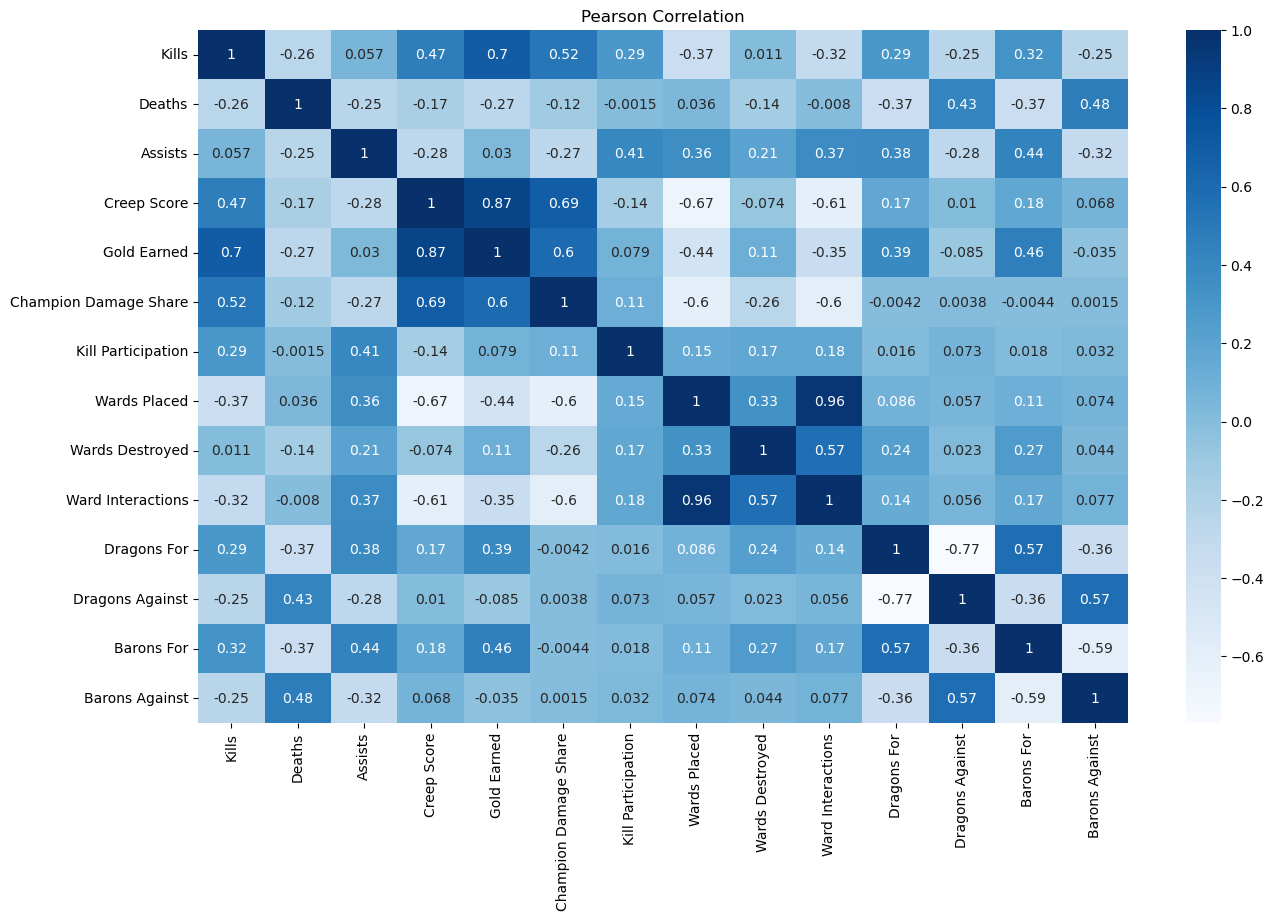

In [8]:
# 히트맵 그래프
plt.figure(figsize=(15,9))
sns.heatmap(lol.corr(), annot=True, cmap='Blues')
plt.title('Pearson Correlation')
plt.show()

In [9]:
# 데이터 타입 변환 (categorical(범주형) 변수로)
df = pd.DataFrame(lol)
df['Team'] = df['Team'].astype('category')
df['Player'] = df['Player'].astype('category')
df['Position'] = df['Position'].astype('category')
df['Champion'] = df['Champion'].astype('category')
df['Opponent'] = df['Opponent'].astype('category')
df['Result'] = df['Result'].astype('category')
print(df.dtypes)

Team                     category
Player                   category
Opponent                 category
Position                 category
Champion                 category
Kills                       int64
Deaths                      int64
Assists                     int64
Creep Score                 int64
Gold Earned                 int64
Champion Damage Share     float64
Kill Participation        float64
Wards Placed                int64
Wards Destroyed             int64
Ward Interactions           int64
Dragons For                 int64
Dragons Against             int64
Barons For                  int64
Barons Against              int64
Result                   category
dtype: object


In [11]:
# 범주형 변수 핸들링
df['Team'] = df['Team'].cat.codes
df['Player'] = df['Player'].cat.codes
df['Position'] = df['Position'].cat.codes
df['Champion'] = df['Champion'].cat.codes
df['Opponent'] = df['Opponent'].cat.codes
df['Result'] = df['Result'].cat.codes
df.head()

,Team,Player,Opponent,Position,Champion,Kills,Deaths,Assists,Creep Score,Gold Earned,Champion Damage Share,Kill Participation,Wards Placed,Wards Destroyed,Ward Interactions,Dragons For,Dragons Against,Barons For,Barons Against,Result
0,9,12,3,4,8,4,5,3,188,11107,0.17,0.78,8,8,16,0,4,0,1,0
1,3,17,9,4,17,3,1,9,217,12201,0.20,0.52,10,7,17,4,0,1,0,1
2,9,2,3,1,57,2,4,5,156,9048,0.15,0.78,8,14,22,0,4,0,1,0
3,3,34,9,1,54,5,4,10,194,11234,0.23,0.65,12,8,20,4,0,1,0,1
4,9,36,3,2,27,1,3,4,216,9245,0.29,0.56,6,9,15,0,4,0,1,0


In [12]:
# 데이터 분할
X = df.drop('Result',axis=1)
y = df['Result']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(154, 19)
(154,)
(66, 19)
(66,)


## 분류 모델

In [13]:
classifiers = [KNeighborsClassifier(n_neighbors=5),
              SVC(kernel='linear', gamma='auto', C=5, probability=True),
              NuSVC(probability=True),
              DecisionTreeClassifier(max_depth=3),
              RandomForestClassifier(random_state=1, max_features='sqrt',
                                    n_jobs=1, verbose=1),
              XGBClassifier(),
              AdaBoostClassifier(),
              GradientBoostingClassifier(),
              GaussianNB(),
              LinearDiscriminantAnalysis(),
              QuadraticDiscriminantAnalysis()]

- NuSVC : 서포트 벡터 머신과 비슷하지만, 지원 벡터의 수를 제어하는 매개변수를 사용
- QuadraticDiscriminantAnalysis : 선형 판별 분석, 클래스 조건부 밀도를 데이터에 맞추고 베이즈 규칙을 사용하여 생성된 2차 결정 경계가 있는 분류기

In [14]:
# 보고서 모델
log_cols = ['Classifier','Accuracy','Log Loss']
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    print('='*30)
    print(name)
    print('****Results****')
    
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print('Accuracy : {:.4%}'.format(acc))
    train_predictions = clf.predict_proba(X_test)
    ll = log_loss(y_test, train_predictions)
    print('Log Loss : {}'.format(ll))
    print('\n')
    
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log=log.append(log_entry)
    
print('='*30)

KNeighborsClassifier
****Results****
Accuracy : 65.1515%
Log Loss : 1.0905065791197928




/var/folders/gx/q7vn3yv17rvb0vy6chbbbztw0000gn/T/ipykernel_2120/2421129956.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log=log.append(log_entry)


SVC
****Results****
Accuracy : 93.9394%
Log Loss : 0.18590920216333823


NuSVC
****Results****
Accuracy : 75.7576%
Log Loss : 0.5761370140504056


DecisionTreeClassifier
****Results****
Accuracy : 87.8788%
Log Loss : 2.7228433955346563


RandomForestClassifier
****Results****
Accuracy : 100.0000%
Log Loss : 0.15500210375646034


XGBClassifier
****Results****
Accuracy : 98.4848%
Log Loss : 0.05443585484207495




/var/folders/gx/q7vn3yv17rvb0vy6chbbbztw0000gn/T/ipykernel_2120/2421129956.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log=log.append(log_entry)
/var/folders/gx/q7vn3yv17rvb0vy6chbbbztw0000gn/T/ipykernel_2120/2421129956.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log=log.append(log_entry)
/var/folders/gx/q7vn3yv17rvb0vy6chbbbztw0000gn/T/ipykernel_2120/2421129956.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log=log.append(log_entry)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 1

AdaBoostClassifier
****Results****
Accuracy : 96.9697%
Log Loss : 0.425446614567959


GradientBoostingClassifier
****Results****
Accuracy : 96.9697%
Log Loss : 0.09543049124980692


GaussianNB
****Results****
Accuracy : 96.9697%
Log Loss : 0.1327914116095065


LinearDiscriminantAnalysis
****Results****
Accuracy : 98.4848%
Log Loss : 0.02382957876038881


QuadraticDiscriminantAnalysis
****Results****
Accuracy : 95.4545%
Log Loss : 0.552069466312285




/var/folders/gx/q7vn3yv17rvb0vy6chbbbztw0000gn/T/ipykernel_2120/2421129956.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log=log.append(log_entry)
/var/folders/gx/q7vn3yv17rvb0vy6chbbbztw0000gn/T/ipykernel_2120/2421129956.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log=log.append(log_entry)
/var/folders/gx/q7vn3yv17rvb0vy6chbbbztw0000gn/T/ipykernel_2120/2421129956.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log=log.append(log_entry)
/var/folders/gx/q7vn3yv17rvb0vy6chbbbztw0000gn/T/ipykernel_2120/2421129956.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log=log.append(log_entry)
/Users/leeshinhaeng/opt/anac

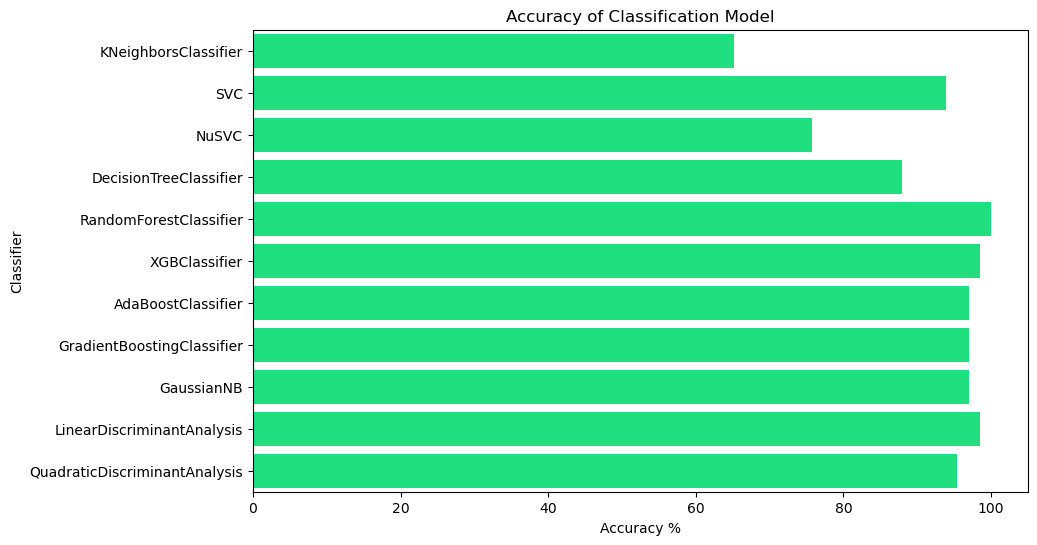

In [15]:
# 정확도 그래프
plt.figure(figsize=(10,6))
sns.set_color_codes('muted')
sns.barplot(x='Accuracy',y='Classifier',data=log, color='springgreen')
plt.xlabel('Accuracy %')
plt.title('Accuracy of Classification Model')
plt.show()
sns.set_color_codes('muted')
plt.show()

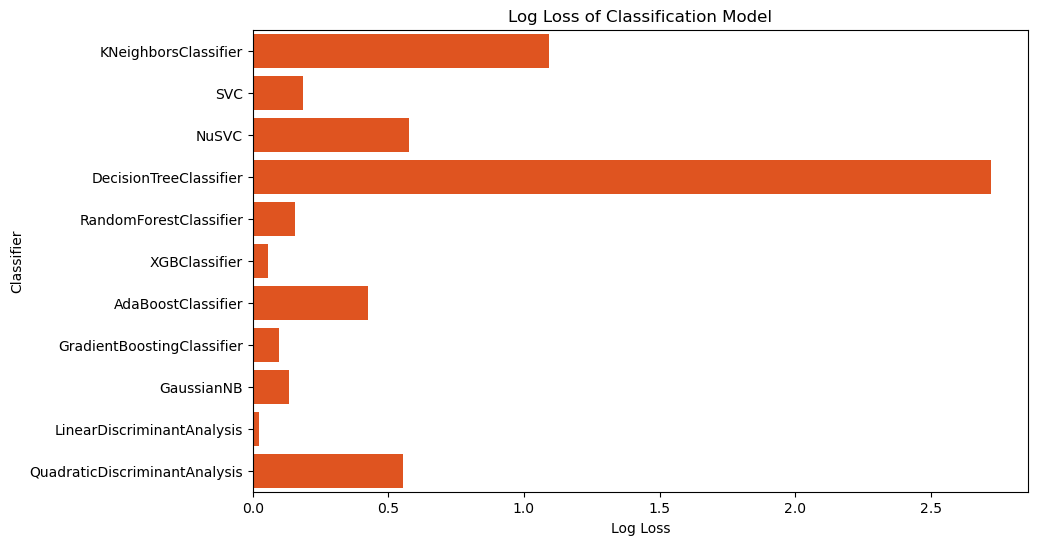

In [16]:
# log loss 그래프
plt.figure(figsize=(10,6))
sns.barplot(x='Log Loss',y='Classifier',data=log, color='orangered')
plt.xlabel('Log Loss')
plt.title('Log Loss of Classification Model')
plt.show()

- 결과를 보면 RandomForest가 제일 좋은 모델 결과가 나오는 것을 확인할 수 있다.

In [17]:
# 모델 만들기
rf = RandomForestClassifier(random_state=1, max_features='sqrt', n_jobs=1, verbose=1)
%time rf.fit(X_train,y_train)

CPU times: user 95.9 ms, sys: 2.83 ms, total: 98.8 ms
Wall time: 97.2 ms


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


RandomForestClassifier(max_features='sqrt', n_jobs=1, random_state=1, verbose=1)

In [18]:
# 예측
y_pred = rf.predict(X_test)
print(y_pred)

[0 0 1 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 0 0 1 0 1 0 1 1 0 0 0 1 1 1 0 1 0
 0 0 1 0 1 0 0 1 0 0 0 0 1 1 0 1 0 0 1 0 0 1 1 1 1 1 0 1 0]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


[[32  0]
 [ 0 34]]


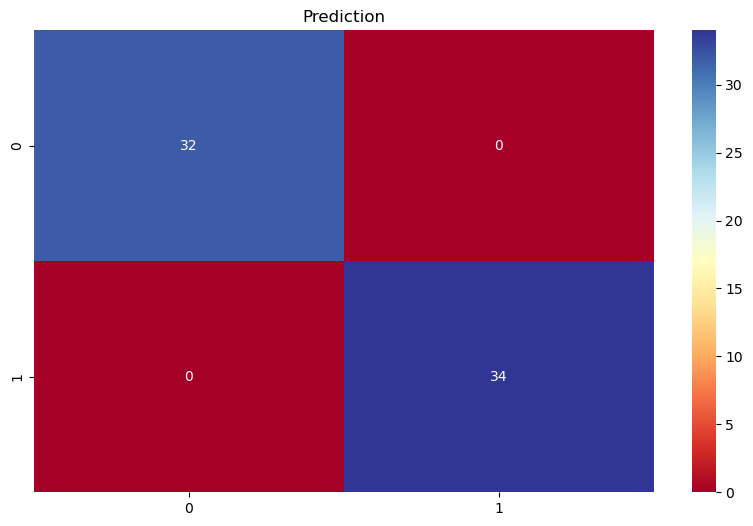

In [20]:
# 오차 행렬
matrix = metrics.confusion_matrix(y_test, y_pred)
print(matrix)

plt.figure(figsize = (10,6))
sns.heatmap(matrix, annot = True, fmt = ".0f", cmap = 'RdYlBu')
plt.title("Prediction")
plt.show()

In [21]:
# 분류 보고서
report = metrics.classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00        34

    accuracy                           1.00        66
   macro avg       1.00      1.00      1.00        66
weighted avg       1.00      1.00      1.00        66



## 변수 중요도 확인

In [22]:
feature = pd.Series(rf.feature_importances_, index = X_train.columns).sort_values(ascending=False)
print(feature)

Barons Against           0.174191
Barons For               0.120639
Deaths                   0.117485
Dragons For              0.111488
Assists                  0.110570
Dragons Against          0.099142
Kills                    0.042302
Team                     0.037712
Opponent                 0.035896
Gold Earned              0.035553
Wards Placed             0.019842
Kill Participation       0.017056
Creep Score              0.015438
Ward Interactions        0.014525
Player                   0.012975
Wards Destroyed          0.012945
Champion Damage Share    0.009492
Champion                 0.008583
Position                 0.004167
dtype: float64


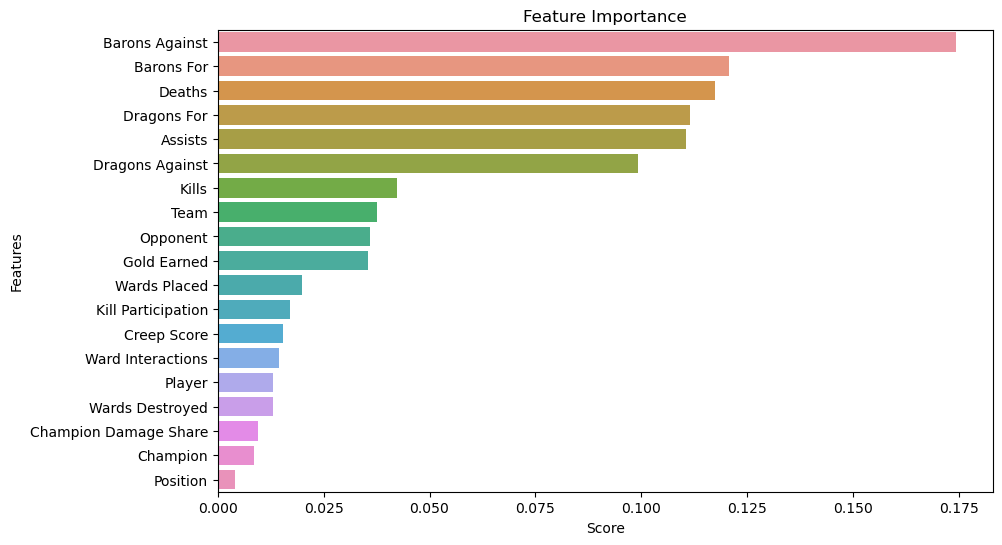

In [23]:
# 변수 중요도 시각화
plt.figure(figsize = (10,6))
sns.barplot(x = feature, y = feature.index)
plt.title("Feature Importance")
plt.xlabel('Score')
plt.ylabel('Features')
plt.show()

## 시각화

In [25]:
team_result = lol.groupby(['Team', 'Result']).size().reset_index(name = 'Count')
print(team_result)

   Team Result  Count
0   BYG      L     15
1   BYG      W     10
2    C9      L     10
3    C9      W     15
4   DFM      L      5
5   DFM      W     20
6    GS      L     10
7    GS      W     10
8   HLE      L      5
9   HLE      W     15
10  INF      L     20
11  LNG      W     20
12  PCE      L     10
13  PCE      W     10
14  RED      L     15
15  RED      W      5
16  UOL      L     20
17  UOL      W      5


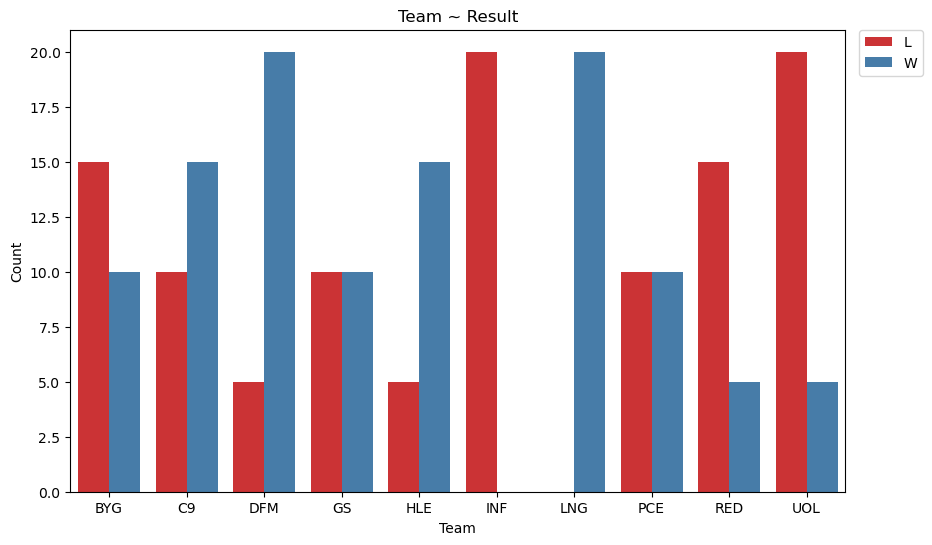

In [26]:
# 팀 결과 시각화
plt.figure(figsize=(10,6))
sns.barplot(x='Team',y='Count', hue='Result', data=team_result, palette='Set1')
plt.title('Team ~ Result')
plt.legend(bbox_to_anchor = (1.1,1), borderaxespad = 0)
plt.show()

In [27]:
op_result = lol.groupby(['Opponent', 'Result']).size().reset_index(name = 'Count')
print(op_result)

   Opponent Result  Count
0       BYG      L     10
1       BYG      W     15
2        C9      L     15
3        C9      W     10
4       DFM      L     20
5       DFM      W      5
6        GS      L     10
7        GS      W     10
8       HLE      L     15
9       HLE      W      5
10      INF      W     20
11      LNG      L     20
12      PCE      L     10
13      PCE      W     10
14      RED      L      5
15      RED      W     15
16      UOL      L      5
17      UOL      W     20


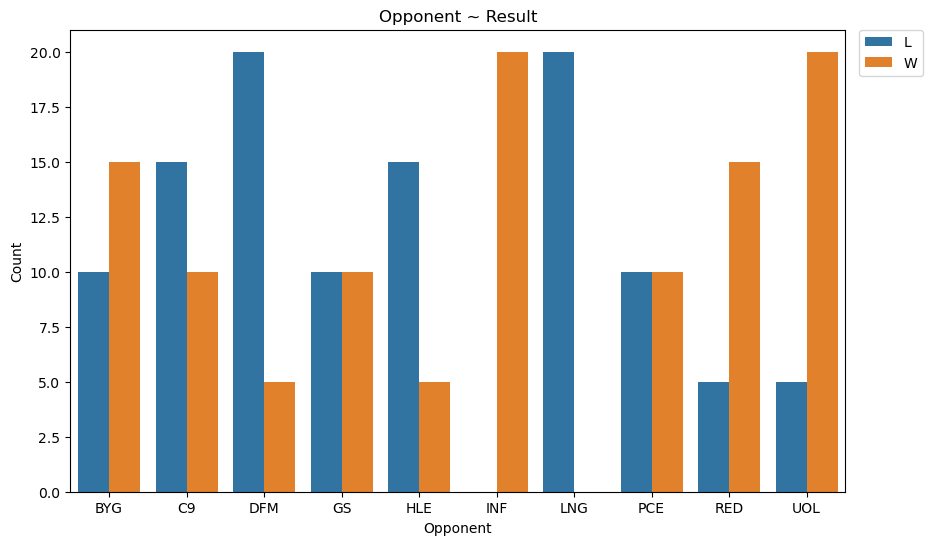

In [28]:
plt.figure(figsize = (10,6))
sns.barplot(x = 'Opponent', y = 'Count', hue = 'Result', data = op_result)
plt.title("Opponent ~ Result")
plt.legend(bbox_to_anchor = (1.1,1), borderaxespad = 0)
plt.show()

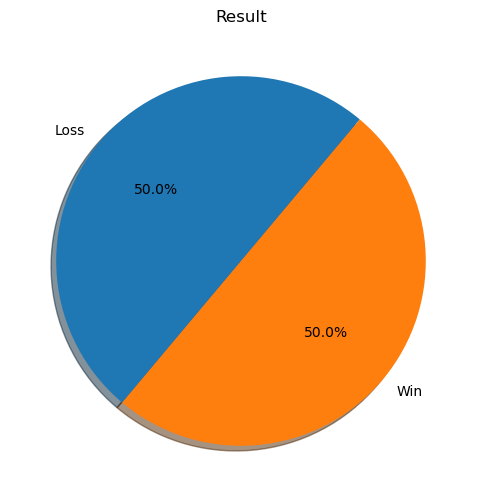

In [29]:
plt.figure(figsize=(10,6))
result = [np.count_nonzero(lol['Result']=='L'),
         np.count_nonzero(lol['Result']=='W')]
activities = ['Loss','Win']
plt.pie(result, labels=activities, startangle=50, autopct='%.1f%%', shadow=True)
plt.title('Result')
plt.show()